# Problem Statement
Build your own recommendation system for products on an e-commerce website like Amazon.com.

# Dataset columns - first three columns are userId, productId, and ratings and the fourth column is timestamp. You can discard the timestamp column as in this case you may not need to use it.

# Step 1
Read and explore the given dataset. ( Rename column/add headers, plot histograms, find data characteristics)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
import Recommenders as Recommenders
import Evaluation as Evaluation
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
pop_df = pd.read_csv('ratings_Electronics.csv')

In [3]:
pop_df.head()

,AKM1MP6P0OYPR,132793040,5,1365811200
0,A2CX7LUOHB2NDG,321732944,5,1341100800
1,A2NWSAGRHCP8N5,439886341,1,1367193600
2,A2WNBOD3WNDNKT,439886341,3,1374451200
3,A1GI0U4ZRJA8WN,439886341,1,1334707200
4,A1QGNMC6O1VW39,511189877,5,1397433600


In [4]:
# Name changing of the columns as per the requirement  1st Colun -- Productid 
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
AKM1MP6P0OYPR    1048575 non-null object
132793040        1048575 non-null object
5                1048575 non-null int64
1365811200       1048575 non-null int64
dtypes: int64(2), object(2)
memory usage: 32.0+ MB


In [5]:
pop_df.columns= ['userId' , 'productid' , 'ratings' , 'timestamp']

In [6]:
pop_df.head()

,userId,productid,ratings,timestamp
0,A2CX7LUOHB2NDG,321732944,5,1341100800
1,A2NWSAGRHCP8N5,439886341,1,1367193600
2,A2WNBOD3WNDNKT,439886341,3,1374451200
3,A1GI0U4ZRJA8WN,439886341,1,1334707200
4,A1QGNMC6O1VW39,511189877,5,1397433600


In [7]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
userId       1048575 non-null object
productid    1048575 non-null object
ratings      1048575 non-null int64
timestamp    1048575 non-null int64
dtypes: int64(2), object(2)
memory usage: 32.0+ MB


In [8]:
pop_df.drop(columns = 'timestamp',index =1 , inplace = True)

In [9]:
pop_df.head()

,userId,productid,ratings
0,A2CX7LUOHB2NDG,321732944,5
2,A2WNBOD3WNDNKT,439886341,3
3,A1GI0U4ZRJA8WN,439886341,1
4,A1QGNMC6O1VW39,511189877,5
5,A3J3BRHTDRFJ2G,511189877,2


In [10]:
pop_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ratings,1048574.0,3.973382,1.399327,1.0,3.0,5.0,5.0,5.0


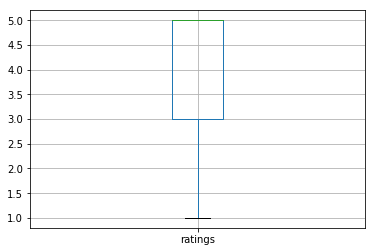

In [11]:
pop_df.boxplot()

In [12]:
pop_group = pop_df.groupby(['userId']).agg({'ratings' : 'count'}).reset_index()

In [13]:
pop_group

,userId,ratings
0,A00037441I8XOQJSUWCAG,1
1,A00038802J7X43YTW44TD,2
2,A000428226SAAAIBK8I36,1
3,A0004478EF5NFPHLGCWG,1
4,A000681618A3WRMCK53V,1
5,A00101847G3FJTWYGNQA,1
6,A00124802J36AVPT3779A,1
7,A00151102CWWUCLQHF6I2,1
8,A0015232111B3971DPSKF,1
9,A00177463W0XWB16A9O05,1


In [14]:
pop_sum = pop_group['ratings'].sum()

In [15]:
pop_sum

1048574

In [16]:
pop_group['percentage'] = pop_group['ratings'].div(pop_sum)*100

In [17]:
pop_group

,userId,ratings,percentage
0,A00037441I8XOQJSUWCAG,1,0.000095
1,A00038802J7X43YTW44TD,2,0.000191
2,A000428226SAAAIBK8I36,1,0.000095
3,A0004478EF5NFPHLGCWG,1,0.000095
4,A000681618A3WRMCK53V,1,0.000095
5,A00101847G3FJTWYGNQA,1,0.000095
6,A00124802J36AVPT3779A,1,0.000095
7,A00151102CWWUCLQHF6I2,1,0.000095
8,A0015232111B3971DPSKF,1,0.000095
9,A00177463W0XWB16A9O05,1,0.000095


In [18]:
pop_df1 = pop_group.sort_values(['ratings','userId'] ,ascending =[0,1])

In [19]:
pop_df1

,userId,ratings,percentage
611112,A5JLAU2ARJ0BO,412,0.039291
226172,A231WM2Z2JL0U3,249,0.023747
240295,A25HBO5V8S8SEA,164,0.015640
616189,A6FIAB28IS79,146,0.013924
747118,AT6CZDCP4TRGA,128,0.012207
698809,AKT8TGIT6VVZ5,122,0.011635
8318,A11D1KHM7DVOQK,112,0.010681
273103,A2B7BUH8834Y6M,103,0.009823
559697,A3OXHLG6DIBRW8,95,0.009060
209005,A203OCQQ12MAVT,90,0.008583


In [20]:
pop_unique = pop_df['userId'].unique()

In [21]:
pop_unique

array(['A2CX7LUOHB2NDG', 'A2WNBOD3WNDNKT', 'A1GI0U4ZRJA8WN', ...,
       'A1H16CBCNEL4G3', 'A2KIYE5RF0OEMY', 'A1G9Q5UJ5Y7DES'], dtype=object)

In [22]:
len(pop_unique)

786328

In [23]:
pop_uni = pop_df['productid'].unique()

In [24]:
pop_uni

array(['321732944', '439886341', '511189877', ..., 'B000IF4G2A',
       'B000IF4TPY', 'B000IF51UQ'], dtype=object)

In [25]:
len(pop_uni)

61893

## SO here we have a total number of the user whcih are present there in the dataset and the total number of the product which exist in the data set

## Total Prodcut -- 61893 ; Total Users --- 786328

In [27]:
# Splitting  the data into train and test and further using the popularity based system
from sklearn import model_selection

train_data,test_data = model_selection.train_test_split(pop_df,test_size=0.30 ,random_state =0)

In [28]:
pm = Recommenders.popularity_recommender_py()

In [29]:
pm.create(train_data, 'userId', 'productid')

In [30]:
#pop_df =pop_df.head(10000)

In [31]:
# pop_df.columns

In [32]:
pm

In [33]:
user_id = pop_unique[50]

In [34]:
pm.recommend(user_id)

,userId,productid,score,Rank
27168,A3B12X05JZKM94,B0002L5R78,6648,1.0
21905,A3B12X05JZKM94,B0001FTVEK,3785,2.0
54875,A3B12X05JZKM94,B000I68BD4,3476,3.0
41670,A3B12X05JZKM94,B000BQ7GW8,3059,4.0
12719,A3B12X05JZKM94,B00007E7JU,2455,5.0
41092,A3B12X05JZKM94,B000BKJZ9Q,2256,6.0
40412,A3B12X05JZKM94,B000B9RI14,2089,7.0
38591,A3B12X05JZKM94,B000A6PPOK,1953,8.0
13249,A3B12X05JZKM94,B00007M1TZ,1802,9.0
4570,A3B12X05JZKM94,B00004ZCJE,1768,10.0


In [35]:
product_id = pop_uni[60]

In [36]:
pm.popularity_recommendations

,productid,score,Rank,userId
27168,B0002L5R78,6648,1.0,A3B12X05JZKM94
21905,B0001FTVEK,3785,2.0,A3B12X05JZKM94
54875,B000I68BD4,3476,3.0,A3B12X05JZKM94
41670,B000BQ7GW8,3059,4.0,A3B12X05JZKM94
12719,B00007E7JU,2455,5.0,A3B12X05JZKM94
41092,B000BKJZ9Q,2256,6.0,A3B12X05JZKM94
40412,B000B9RI14,2089,7.0,A3B12X05JZKM94
38591,B000A6PPOK,1953,8.0,A3B12X05JZKM94
13249,B00007M1TZ,1802,9.0,A3B12X05JZKM94
4570,B00004ZCJE,1768,10.0,A3B12X05JZKM94


In [37]:
pm.recommend(product_id).transpose()

,27168,21905,54875,41670,12719,41092,40412,38591,13249,4570
userId,140053271X,140053271X,140053271X,140053271X,140053271X,140053271X,140053271X,140053271X,140053271X,140053271X
productid,B0002L5R78,B0001FTVEK,B000I68BD4,B000BQ7GW8,B00007E7JU,B000BKJZ9Q,B000B9RI14,B000A6PPOK,B00007M1TZ,B00004ZCJE
score,6648,3785,3476,3059,2455,2256,2089,1953,1802,1768
Rank,1,2,3,4,5,6,7,8,9,10


In [38]:
test_data

,userId,productid,ratings
875681,A3HQ45V42HC8GO,B000EPNDEG,4
1046906,A18N2RPPBF5MF9,B000IECE66,1
646862,ANJALC6WRXG4S,B00085502U,3
704386,A3LKYTBBZGF97P,B000A6LSKU,4
798052,A12AH1HGN5HL4U,B000CCXCYC,5
800218,A2XM95ZETIGIX6,B000CFSLXG,5
267712,ACW19D3XNHZT5,B00009329J,4
363948,A2UTMZE5APQI3I,B00013BNLQ,4
1018796,AFXGMHEN5J6BM,B000I04WWY,5
980271,AEMH7KMJWCAQG,B000GWRFP0,1


In [39]:
test_user = test_data['userId'].unique()

In [40]:
test_user

array(['A3HQ45V42HC8GO', 'A18N2RPPBF5MF9', 'ANJALC6WRXG4S', ...,
       'A3V65TD28UCE3O', 'A13W7CB4AYPX2J', 'A1SP03DPJOR3NQ'], dtype=object)

In [41]:
len(test_user)

276188

In [42]:
user_id = test_user[70]

In [43]:
pm.recommend(user_id)

,userId,productid,score,Rank
27168,A1VAOHDMGXHWWA,B0002L5R78,6648,1.0
21905,A1VAOHDMGXHWWA,B0001FTVEK,3785,2.0
54875,A1VAOHDMGXHWWA,B000I68BD4,3476,3.0
41670,A1VAOHDMGXHWWA,B000BQ7GW8,3059,4.0
12719,A1VAOHDMGXHWWA,B00007E7JU,2455,5.0
41092,A1VAOHDMGXHWWA,B000BKJZ9Q,2256,6.0
40412,A1VAOHDMGXHWWA,B000B9RI14,2089,7.0
38591,A1VAOHDMGXHWWA,B000A6PPOK,1953,8.0
13249,A1VAOHDMGXHWWA,B00007M1TZ,1802,9.0
4570,A1VAOHDMGXHWWA,B00004ZCJE,1768,10.0


In [44]:
## SO it shows  clearly that once the Popularity based recommendation system i sbuilt it will show us the REcommendations 
## based on the popularity of the item and since from the dataset we have already 

In [45]:
## Working on the Collabartivie Filtering user (item based )

collab = pd.read_csv('ratings_Electronics.csv',encoding = "ISO-8859-1")

In [46]:
collab = collab.head(50000)

In [47]:
collab.columns = ['userId','itemId','ratings','timestamp']

In [48]:
collab.columns

Index(['userId', 'itemId', 'ratings', 'timestamp'], dtype='object')

In [49]:
collab.shape

(50000, 4)

In [50]:
collab.head()

,userId,itemId,ratings,timestamp
0,A2CX7LUOHB2NDG,321732944,5,1341100800
1,A2NWSAGRHCP8N5,439886341,1,1367193600
2,A2WNBOD3WNDNKT,439886341,3,1374451200
3,A1GI0U4ZRJA8WN,439886341,1,1334707200
4,A1QGNMC6O1VW39,511189877,5,1397433600


In [51]:
collab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
userId       50000 non-null object
itemId       50000 non-null object
ratings      50000 non-null int64
timestamp    50000 non-null int64
dtypes: int64(2), object(2)
memory usage: 1.5+ MB


In [52]:
## Our Itemid and USerid are both of the type object where we need them to be type str.
collab.userId = collab.userId.astype(str)
collab.itemId = collab.itemId.astype(str)

In [53]:
collab.columns

Index(['userId', 'itemId', 'ratings', 'timestamp'], dtype='object')

In [54]:
collab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
userId       50000 non-null object
itemId       50000 non-null object
ratings      50000 non-null int64
timestamp    50000 non-null int64
dtypes: int64(2), object(2)
memory usage: 1.5+ MB


In [55]:
## Total unique users 
collab.userId.unique()

array(['A2CX7LUOHB2NDG', 'A2NWSAGRHCP8N5', 'A2WNBOD3WNDNKT', ...,
       'A3IZXJRV8RHUQC', 'AL0XGCBE6Z22M', 'A3OFI1JD2KA9WD'], dtype=object)

In [56]:
#Getting the length of the unqiue users. 
len(collab.userId.unique())

46554

In [57]:
##Users with maximum number of items rated. 
collab['userId'].value_counts().head()

A231WM2Z2JL0U3    37
AY8Q1X7G96HV5     31
ALUNVOQRXOZIA     20
A1NVD0TKNS1GT5    19
A243HY69GIAHFI    18
Name: userId, dtype: int64

In [58]:
# So here we have these 5 user id with the highest rating 
## Now for Collabaritive filtering transforming the data to surprise package form

from surprise import Dataset,Reader
reader = Reader(rating_scale=(1,5))

In [59]:
collab_df = Dataset.load_from_df(collab[['userId','itemId','ratings']],reader)

In [60]:
collab_df

In [61]:
# Splitting  the data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(collab_df, test_size=.30,random_state=99)

# to build on full data there is an option available called -- trainset = data.build_full_trainset()


In [62]:
# WE created a datatype of the Surprise type 

type(trainset)

surprise.trainset.Trainset

In [63]:
## Now as per communicated in the video the User id and the item id has been converted now into raw ids and the trainset here
## will be having the inner id to map through the userid and the itemid ()

## Obtaining USer records now 

user_records = trainset.ur

In [64]:
type(user_records)

collections.defaultdict

In [65]:
##Now we can iterate through the keys to get the values of the User recoerds

#for keys in user_records.keys():
 #   print(keys)

In [66]:
## HEre it shows all the number of userid now there are around 582571 records.

user_records[0]

[(0, 1.0), (59, 5.0)]

In [67]:
# Here we see that there is associated with  user_records which seems to be like some user id with the ratings provided. 

print(trainset.to_raw_uid(3))


ARV2YOGYQYJ5A


In [68]:
print(trainset.to_inner_uid('A2ICE47SJFD90U'))

22639


In [69]:
# So here we see that the USer id associated with the 0 element is AWVBZUFM6E7DW Now let's print the item id associated with it
#3 Taking the 2 vlaue in the user_records[0] array that is (2561,5)

print(trainset.to_raw_iid(0))

B00000J060


In [70]:
trainset.to_inner_iid('B00000J060')

0

In [71]:
trainset.to_inner_uid('ARV2YOGYQYJ5A')


3

In [72]:
## Training the model 

from surprise import KNNWithMeans
from surprise import accuracy

In [73]:
algo = KNNWithMeans(k= 50, sim_options={'name': 'pearson', 'user_based': False})
#algo.fit(trainset)


In [74]:
algo.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [75]:
algo.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [76]:
## AFTER running the algo.fit (trainset )we come to know that the algo fit was not getting trained on so many recrods hence we need to reduce the records

### Find K most similiar items
#algo.get_neighbors()

In [77]:
##Evaluating the model Performance --

len(testset)

15000

In [78]:
testset[0:5]

[('A38DL7RBD7MZUK', 'B00001P4ZH', 5.0),
 ('A2BTFEHZLSLWG7', 'B00004T1XE', 5.0),
 ('A2GE5FBKLKJ3TE', 'B00000J1G3', 5.0),
 ('A1PE3YXXG2MOGJ', 'B00000J0D8', 3.0),
 ('A2F07Q1T1NFTOD', 'B00004TH2X', 5.0)]

In [79]:
test_pred = algo.test(testset)

In [80]:
## COmpute the RMSE score 

accuracy.rmse(test_pred)

RMSE: 1.3649


1.3649249609470167

In [81]:
# We see that the RMSE score has cross 1 which is no doubt a pretty high value and for the same we will be usin the SVD approach to calculate and reduce the sparsity
test_pred[2315]

Prediction(uid='A3URVWPFJOHT72', iid='B00004TDL2', r_ui=4.0, est=4.147058823529412, details={'actual_k': 0, 'was_impossible': False})

In [82]:
test_pred[50]

Prediction(uid='A1PB83HJJ0023', iid='B00004SB92', r_ui=4.0, est=4.0396857142857145, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'})

In [83]:
#test_pred[100].details["actual_k"]

In [84]:
# convert results to dataframe
test_pred_df = pd.DataFrame(test_pred)
test_pred_df["was_impossible"] = [x["was_impossible"] for x in test_pred_df["details"]]

In [85]:
test_pred_df.loc[test_pred_df.was_impossible]

,uid,iid,r_ui,est,details,was_impossible
0,A38DL7RBD7MZUK,B00001P4ZH,5.0,4.039686,"{'was_impossible': True, 'reason': 'User and/o...",True
1,A2BTFEHZLSLWG7,B00004T1XE,5.0,4.039686,"{'was_impossible': True, 'reason': 'User and/o...",True
2,A2GE5FBKLKJ3TE,B00000J1G3,5.0,4.039686,"{'was_impossible': True, 'reason': 'User and/o...",True
3,A1PE3YXXG2MOGJ,B00000J0D8,3.0,4.039686,"{'was_impossible': True, 'reason': 'User and/o...",True
4,A2F07Q1T1NFTOD,B00004TH2X,5.0,4.039686,"{'was_impossible': True, 'reason': 'User and/o...",True
5,A38WEAJCK9BFP,B00004RIUJ,1.0,4.039686,"{'was_impossible': True, 'reason': 'User and/o...",True
6,A2H009ZD8VC7EL,B00004SYAG,4.0,4.039686,"{'was_impossible': True, 'reason': 'User and/o...",True
7,AG7IGPAURTTLU,7538637400,5.0,4.039686,"{'was_impossible': True, 'reason': 'User and/o...",True
8,A1C6VL5YD7ISGG,140053271X,1.0,4.039686,"{'was_impossible': True, 'reason': 'User and/o...",True
9,A32CU91HSH2CN1,9966295364,5.0,4.039686,"{'was_impossible': True, 'reason': 'User and/o...",True


In [86]:
## SO in total We see that there are 26275 record having has impossible true .The main reason behind the was impossible being truw is 
## is unavailability of the information for these id's and actually there were no information present(ratings ) to nuild the relation upon 

#looking at the hea of the information 

test_pred_df.loc[test_pred_df.was_impossible].head(5)

,uid,iid,r_ui,est,details,was_impossible
0,A38DL7RBD7MZUK,B00001P4ZH,5.0,4.039686,"{'was_impossible': True, 'reason': 'User and/o...",True
1,A2BTFEHZLSLWG7,B00004T1XE,5.0,4.039686,"{'was_impossible': True, 'reason': 'User and/o...",True
2,A2GE5FBKLKJ3TE,B00000J1G3,5.0,4.039686,"{'was_impossible': True, 'reason': 'User and/o...",True
3,A1PE3YXXG2MOGJ,B00000J0D8,3.0,4.039686,"{'was_impossible': True, 'reason': 'User and/o...",True
4,A2F07Q1T1NFTOD,B00004TH2X,5.0,4.039686,"{'was_impossible': True, 'reason': 'User and/o...",True


In [87]:
# predicting for Single user
algo.predict(uid='A11312A9J5RL9J', iid='B00004THCZ')

Prediction(uid='A11312A9J5RL9J', iid='B00004THCZ', r_ui=None, est=5, details={'actual_k': 1, 'was_impossible': False})

In [88]:
## Generating the top N recommendations 

testset_new = trainset.build_anti_testset()

In [89]:
len(testset_new)

100711450

In [90]:
testset_new[0:5]

[('A3UXU4YM508ZEA', 'B00001P4ZH', 4.0396857142857145),
 ('A3UXU4YM508ZEA', '972683275', 4.0396857142857145),
 ('A3UXU4YM508ZEA', '140053271X', 4.0396857142857145),
 ('A3UXU4YM508ZEA', '9966308792', 4.0396857142857145),
 ('A3UXU4YM508ZEA', 'B00004THCZ', 4.0396857142857145)]

In [91]:
## Hence we see here that for the same user id the system have shown 5 recommendation. 
predictions = algo.test(testset_new[0:10000])

In [92]:
predictions_df = pd.DataFrame([[x.uid,x.est] for x in predictions])

In [93]:
predictions_df.columns = ["userId","est_rating"]## Try adding the Itemid here and make predictions
predictions_df.sort_values(by = ["userId", "est_rating"],ascending=False,inplace=True)

In [94]:
predictions_df.head()

,userId,est_rating
9137,ARV2YOGYQYJ5A,5.0
9157,ARV2YOGYQYJ5A,5.0
9176,ARV2YOGYQYJ5A,5.0
9198,ARV2YOGYQYJ5A,5.0
9199,ARV2YOGYQYJ5A,5.0


In [95]:
top_10_recos = predictions_df.groupby("userId").head(10).reset_index(drop=True)

In [96]:
top_10_recos

,userId,est_rating
0,ARV2YOGYQYJ5A,5.0
1,ARV2YOGYQYJ5A,5.0
2,ARV2YOGYQYJ5A,5.0
3,ARV2YOGYQYJ5A,5.0
4,ARV2YOGYQYJ5A,5.0
5,ARV2YOGYQYJ5A,5.0
6,ARV2YOGYQYJ5A,5.0
7,ARV2YOGYQYJ5A,5.0
8,ARV2YOGYQYJ5A,5.0
9,ARV2YOGYQYJ5A,5.0


In [97]:
## SVD Based Recommendation

In [98]:
# Lets exclude movies with very few ratings, say less than 5
item_count = collab["itemId"].value_counts(ascending=False)
pop_item = item_count.loc[item_count.values > 50].index
len(pop_item)
## AS atleast when haviung such a large userid we wil have to take the 

165

In [99]:
collab_rate = collab.loc[collab.itemId.isin(pop_item)]
collab_rate.shape

(30758, 4)

In [100]:
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))
data_svd = Dataset.load_from_df(collab_rate[['userId', 'itemId', 'ratings']], reader)

In [101]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data_svd, test_size=.25,random_state=111)

# to build on full data
#trainset = data.build_full_trainset()

In [102]:
from surprise import SVD
from surprise import accuracy

In [103]:
svd_model = SVD(n_factors=30,biased=False)
svd_model.fit(trainset)

In [104]:
test_pred = svd_model.test(testset)

In [105]:
accuracy.rmse(test_pred)

RMSE: 1.4583


1.4583254110627757

In [106]:
## SO here we get our RMSE score of around 1.31 After using the SVD approcah whih is lower then our usual model used 

 ##Recreating theuser_factors = svd_model.pu
user_factors = svd_model.pu
user_factors.shape
item_factors = svd_model.qi
item_factors.shape

(22485, 30)

(165, 30)

In [107]:
## WE see that our RMSE score has not been reduced but we are getting enough items nit
pred = np.dot(user_factors,np.transpose(item_factors))

In [108]:
pred[5889,0:5]

array([ 0.81439097,  0.97227431, -0.55116153, -0.01580765, -1.09364344])

In [109]:
svd_model.predict(uid = trainset.to_raw_uid(5889), iid = trainset.to_raw_iid(0))

Prediction(uid='AQXVDPXWOJLH3', iid='B00001W0DI', r_ui=None, est=1, details={'was_impossible': False})

In [110]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_factors' : [5,10,15], "reg_all":[0.01,0.02]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3,refit = True)


In [111]:
gs.fit(data_svd)

In [112]:
gs.param_combinations

[{'n_factors': 5, 'reg_all': 0.01},
 {'n_factors': 5, 'reg_all': 0.02},
 {'n_factors': 10, 'reg_all': 0.01},
 {'n_factors': 10, 'reg_all': 0.02},
 {'n_factors': 15, 'reg_all': 0.01},
 {'n_factors': 15, 'reg_all': 0.02}]

In [113]:
gs.best_params

{'rmse': {'n_factors': 10, 'reg_all': 0.02}}

In [114]:
test_pred_gs = gs.test(testset)

In [115]:
test_pred_gs

[Prediction(uid='A3HCZTTUH3CW9Z', iid='B00004TBLW', r_ui=5.0, est=4.435230688364674, details={'was_impossible': False}),
 Prediction(uid='A371ZZ95ZQEIZV', iid='972683275', r_ui=4.0, est=4.427204307982428, details={'was_impossible': False}),
 Prediction(uid='A2BESHHTTDGI2Y', iid='B00004SABB', r_ui=5.0, est=4.1383535291429325, details={'was_impossible': False}),
 Prediction(uid='A3T5N5ZG7S10Y2', iid='B00000JI4F', r_ui=1.0, est=2.741645820638783, details={'was_impossible': False}),
 Prediction(uid='A24JVGSBFEBLJB', iid='B00004SABB', r_ui=4.0, est=3.7069818890963755, details={'was_impossible': False}),
 Prediction(uid='A2XSVUB7FL92OW', iid='B00004SABB', r_ui=5.0, est=3.8959916396702856, details={'was_impossible': False}),
 Prediction(uid='A1UIUV0YRYPAAV', iid='B00000K2YR', r_ui=1.0, est=3.5937499297048165, details={'was_impossible': False}),
 Prediction(uid='A19YG4HWV7EUK9', iid='B00000JCT8', r_ui=5.0, est=3.722205701474041, details={'was_impossible': False}),
 Prediction(uid='ACDF89QDFFW5

In [116]:
accuracy.rmse(test_pred_gs)

RMSE: 1.0339


1.0339227980754726

Hence Here we see that using the SVD  with grid search we have finally reduced our rmse score.
<b> Computing Similarity Matrix </b>

In [117]:
import numpy as np

In [118]:
item_factors

array([[ 2.42336755,  0.19313925, -1.51231036, ..., -0.76862462,
         0.36339238,  2.14512163],
       [ 2.16205328, -2.34806321, -0.56243774, ...,  1.37630132,
        -0.20390166, -0.72278769],
       [-1.15384719,  0.38515738,  2.08375794, ...,  0.43095393,
         1.58583616, -1.60117158],
       ...,
       [ 0.19078852, -0.77498365, -0.61089075, ...,  0.36019026,
         0.92966199, -0.74846234],
       [-0.28073016, -1.26086373,  0.67387685, ...,  1.30946362,
         1.04379926, -1.44346535],
       [-0.76598816, -0.56173087,  0.65375714, ..., -2.03554475,
        -0.70591481,  0.64642547]])

In [119]:
item_sim = np.corrcoef(item_factors)
max_val = (-item_sim).argsort()

In [126]:
topk = pd.DataFrame(max_val[:,0:30])

In [127]:
topk

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0,40,63,13,20,164,160,144,154,96,...,69,46,26,32,57,97,132,84,43,9
1,1,118,10,89,162,58,163,24,49,59,...,27,42,120,18,94,158,21,110,13,5
2,2,53,117,126,144,91,163,82,50,21,...,103,48,57,99,5,79,94,49,111,45
3,3,93,133,95,70,106,164,153,124,72,...,28,139,65,55,120,47,88,140,154,98
4,4,17,70,28,62,8,7,127,113,95,...,38,131,41,50,129,143,71,140,61,63
5,5,117,163,123,94,150,16,127,136,27,...,92,21,112,51,132,152,1,81,55,52
6,6,35,51,24,52,132,55,71,72,143,...,120,140,70,122,97,22,129,31,46,130
7,7,55,140,4,117,65,13,50,17,27,...,136,24,104,154,90,156,8,78,123,155
8,8,138,151,123,4,46,140,116,55,6,...,97,61,108,131,7,99,75,58,40,50
9,9,71,53,85,161,10,139,46,69,147,...,116,130,154,162,43,75,88,89,25,59


In [128]:
# create item iid dictionary

all_item = [trainset.to_raw_iid(x) for x in range(0,165)]
item_iid_dict = dict(zip(range(0,165), all_item))

In [129]:
topi = topk.replace(item_iid_dict)

In [130]:
topi

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,B00001W0DI,B00000J1QR,B00000JFMK,B00003WGP5,B00000JI4F,9985511476,B00000J05A,B00004RIUJ,B00004TH2X,B00002ST80,...,B00004SY4H,B00001ZWXA,B00000J4EY,B000026D8E,B00000JYLO,B00000J1UQ,B00000J1EJ,B00000JCTO,B00000J1V3,B00004LMEC
1,B00000K2YR,B00000J0D5,B00000JSGF,B000001OM5,B00000JII6,1400501466,B00004SYNX,B00004THDE,B00000J4GE,B00004RC2D,...,B00001P4XA,B00004S9AK,B000038AB2,B00003CWDH,B00004TDSC,B0000228GF,B00001WRSJ,B00004T1XE,B00003WGP5,9983891212
2,B00004TDLD,B00001W0DH,1400501776,B00000JMUG,B00004RIUJ,B00004RFB8,B00004SYNX,B00003006K,B000001ON6,B00001WRSJ,...,1400501520,B00000J3UJ,B00000JYLO,B00002N7FQ,9983891212,B00000JBPB,B00004TDSC,B00000J4GE,B00000JHWX,B00003CWDQ
3,B00004SPUN,B00004SGD3,B00004SB99,B00000JFIF,B00004RDL5,8862935293,9985511476,B00002JXFH,9888002198,B00001W0DD,...,B00004T1XK,B00000JDF6,B00004TDN0,B00001P4XH,B000038AB2,B00004SB92,B000021YUO,B00003006R,B00004TH2X,B000028F42
4,B00004SABB,B00001QEMF,B00004RDL5,B00004T1XK,B00000K4KH,B00000J1QK,B00003CWDG,1400599997,7214047977,B00000JFIF,...,B00000J1EQ,B000021YU8,B00001P4ZR,B000001ON6,B00003G1RG,B00004R8V6,B00000JDF5,B00003006R,B0000222MY,B00000JFMK
5,9983891212,1400501776,B00004SYNX,B00004TDL2,B00004TDSC,B000001OM4,1400532655,1400599997,1400698987,B00001P4XA,...,B00002SWHH,B00001WRSJ,B00000JDHV,B00000K135,B00000J1EJ,B00000IGBF,B00000K2YR,B00002NDRQ,B00001P4XH,B00000JD34
6,B00000J1U8,B00000J3NF,B00000K135,B00004THDE,B00000JD34,B00000J1EJ,B00001P4XH,B00000JDF5,B00001W0DD,B00004R8V6,...,B000038AB2,B00003006R,B00004RDL5,B00004TEN2,B00000J1UQ,B00004SABJ,B00003G1RG,B000031KIM,B00001ZWXA,B00004RC2E
7,B00003CWDG,B00001P4XH,B00003006R,B00004SABB,1400501776,B00004TDN0,B00003WGP5,B000001ON6,B00001QEMF,B00001P4XA,...,1400698987,B00004THDE,B00000J1TX,B00004TH2X,B000023VUL,B00004TDN2,B00000J1QK,B00003CWDK,B00004TDL2,B0000228GG
8,B00000J1QK,B00004SQET,B00004RG6K,B00004TDL2,B00004SABB,B00001ZWXA,B00003006R,B00004TENT,B00001P4XH,B00000J1U8,...,B00000J1UQ,B0000222MY,B00000JBHP,B000021YU8,B00003CWDG,B00002N7FQ,B00000J0D2,1400501466,B00000J1QR,B000001ON6
9,B00004LMEC,B00000JDF5,B00001W0DH,B00000J6WY,B00000K2YV,B00000JSGF,B00000JDF6,B00001ZWXA,B00004SY4H,B00001W0DG,...,B00004TENT,B00004RC2E,B00004TH2X,B00000JII6,B00000J1V3,B00000J0D2,B000021YUO,B000001OM5,B00000J1V5,B00004RC2D


In [131]:
## So HEre we get the similarity matrix for the top i item 

topi["item"] = all_item

In [132]:
topi

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,item
0,B00001W0DI,B00000J1QR,B00000JFMK,B00003WGP5,B00000JI4F,9985511476,B00000J05A,B00004RIUJ,B00004TH2X,B00002ST80,...,B00001ZWXA,B00000J4EY,B000026D8E,B00000JYLO,B00000J1UQ,B00000J1EJ,B00000JCTO,B00000J1V3,B00004LMEC,B00001W0DI
1,B00000K2YR,B00000J0D5,B00000JSGF,B000001OM5,B00000JII6,1400501466,B00004SYNX,B00004THDE,B00000J4GE,B00004RC2D,...,B00004S9AK,B000038AB2,B00003CWDH,B00004TDSC,B0000228GF,B00001WRSJ,B00004T1XE,B00003WGP5,9983891212,B00000K2YR
2,B00004TDLD,B00001W0DH,1400501776,B00000JMUG,B00004RIUJ,B00004RFB8,B00004SYNX,B00003006K,B000001ON6,B00001WRSJ,...,B00000J3UJ,B00000JYLO,B00002N7FQ,9983891212,B00000JBPB,B00004TDSC,B00000J4GE,B00000JHWX,B00003CWDQ,B00004TDLD
3,B00004SPUN,B00004SGD3,B00004SB99,B00000JFIF,B00004RDL5,8862935293,9985511476,B00002JXFH,9888002198,B00001W0DD,...,B00000JDF6,B00004TDN0,B00001P4XH,B000038AB2,B00004SB92,B000021YUO,B00003006R,B00004TH2X,B000028F42,B00004SPUN
4,B00004SABB,B00001QEMF,B00004RDL5,B00004T1XK,B00000K4KH,B00000J1QK,B00003CWDG,1400599997,7214047977,B00000JFIF,...,B000021YU8,B00001P4ZR,B000001ON6,B00003G1RG,B00004R8V6,B00000JDF5,B00003006R,B0000222MY,B00000JFMK,B00004SABB
5,9983891212,1400501776,B00004SYNX,B00004TDL2,B00004TDSC,B000001OM4,1400532655,1400599997,1400698987,B00001P4XA,...,B00001WRSJ,B00000JDHV,B00000K135,B00000J1EJ,B00000IGBF,B00000K2YR,B00002NDRQ,B00001P4XH,B00000JD34,9983891212
6,B00000J1U8,B00000J3NF,B00000K135,B00004THDE,B00000JD34,B00000J1EJ,B00001P4XH,B00000JDF5,B00001W0DD,B00004R8V6,...,B00003006R,B00004RDL5,B00004TEN2,B00000J1UQ,B00004SABJ,B00003G1RG,B000031KIM,B00001ZWXA,B00004RC2E,B00000J1U8
7,B00003CWDG,B00001P4XH,B00003006R,B00004SABB,1400501776,B00004TDN0,B00003WGP5,B000001ON6,B00001QEMF,B00001P4XA,...,B00004THDE,B00000J1TX,B00004TH2X,B000023VUL,B00004TDN2,B00000J1QK,B00003CWDK,B00004TDL2,B0000228GG,B00003CWDG
8,B00000J1QK,B00004SQET,B00004RG6K,B00004TDL2,B00004SABB,B00001ZWXA,B00003006R,B00004TENT,B00001P4XH,B00000J1U8,...,B0000222MY,B00000JBHP,B000021YU8,B00003CWDG,B00002N7FQ,B00000J0D2,1400501466,B00000J1QR,B000001ON6,B00000J1QK
9,B00004LMEC,B00000JDF5,B00001W0DH,B00000J6WY,B00000K2YV,B00000JSGF,B00000JDF6,B00001ZWXA,B00004SY4H,B00001W0DG,...,B00004RC2E,B00004TH2X,B00000JII6,B00000J1V3,B00000J0D2,B000021YUO,B000001OM5,B00000J1V5,B00004RC2D,B00004LMEC
